In [8]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from src.path_loss import PathLossInHIndoorOfficeLOS, \
                          PathLossInHIndoorOfficeNLOSSingle, \
                          PathLossInHIndoorOfficeNLOSDual, \
                          PathLossInHShoppingMallsLOS, \
                          PathLossInHShoppingMallsNLOSSingle, \
                          PathLossInHShoppingMallsNLOSDual

from src.network_sim import NetworkSimulator


%reload_ext autoreload
%autoreload 2
%aimport src

In [9]:
def line_of_sight_probability(cls, distance_m):
    if distance_m <= 1.2:
        return 1
    elif distance_m < 6.5:
        return math.exp(-(distance_m - 1.2) / 4.7)
    else:
        return math.exp(-(distance_m - 6.5) / 32.6) * 0.32

In [10]:
frequency_Hz= 50 * 1e9 # Hz
distance_m = 50
sample_size = 10

In [11]:
pd.DataFrame({
    'PathLossInHShoppingMallsLOS':[PathLossInHIndoorOfficeLOS().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHIndoorOfficeNLOSSingle': [PathLossInHIndoorOfficeNLOSSingle().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHIndoorOfficeNLOSDual': [PathLossInHIndoorOfficeNLOSDual().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMallsLOS': [PathLossInHShoppingMallsLOS().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMallsNLOSSingle': [PathLossInHShoppingMallsNLOSSingle().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMallsNLOSDual': [PathLossInHShoppingMallsNLOSDual().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
})

,PathLossInHShoppingMallsLOS,PathLossInHIndoorOfficeNLOSSingle,PathLossInHIndoorOfficeNLOSDual,PathLossInHShoppingMallsNLOSSingle,PathLossInHShoppingMallsNLOSDual
0,-94.127108,-106.993664,-130.399250,-111.376660,-115.109629
1,-97.534361,-117.870017,-124.389267,-129.473916,-110.618776
2,-99.445054,-112.999309,-138.844753,-112.516163,-108.198781
3,-97.869628,-132.880130,-122.913648,-108.916400,-110.861996
4,-93.918987,-132.841559,-122.157815,-98.565968,-114.000071
5,-91.367181,-116.332243,-123.353273,-110.591860,-93.275187
6,-96.713779,-116.505378,-114.784030,-102.649660,-109.445153
7,-95.323238,-140.161912,-134.965671,-109.745779,-110.230553
8,-96.998353,-118.307017,-120.482969,-112.835224,-109.684696
9,-97.278032,-114.504807,-139.068743,-105.735191,-109.123380


In [15]:
simulator = NetworkSimulator(Tx_radius=50, Rx_radius=20, num_Tx_known=3, num_Rx_per_Tx_known=5, num_Tx_unknown=2, num_Rx_per_Tx_unknown=3)

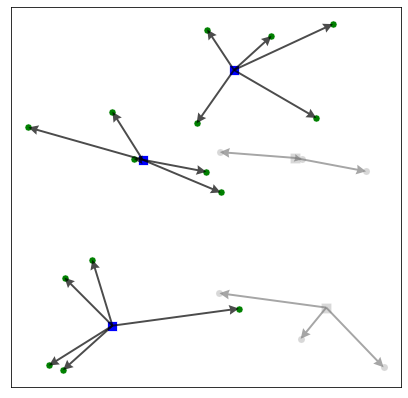

In [16]:
simulator.plot_network()